In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sqlite3
con = sqlite3.connect("./DB/drugs.db")

In [3]:
df = pd.read_sql_query("SELECT * from drug_action", con)

In [4]:
df.head(), df.tail()

(       cid          target     ki ic50 kd
 0  3081361  HIV-1 Protease   0.24        
 1  5327236  HIV-1 Protease   0.25        
 2  5327235  HIV-1 Protease   0.41        
 3  5327234  HIV-1 Protease    0.8        
 4  3009319  HIV-1 Protease   0.99        ,
               cid                          target      ki ic50 kd
 1812804  91898556  Leucyl-cystinyl aminopeptidase    1700        
 1812805  91898557  Leucyl-cystinyl aminopeptidase    4000        
 1812806  91898558  Leucyl-cystinyl aminopeptidase   11900        
 1812807  91898559  Leucyl-cystinyl aminopeptidase    2600        
 1812808  91898560  Leucyl-cystinyl aminopeptidase    1600        )

In [5]:
df.head()

,cid,target,ki,ic50,kd
0,3081361,HIV-1 Protease,0.24,,
1,5327236,HIV-1 Protease,0.25,,
2,5327235,HIV-1 Protease,0.41,,
3,5327234,HIV-1 Protease,0.8,,
4,3009319,HIV-1 Protease,0.99,,


In [6]:
df.shape

(1812809, 5)

In [7]:
df.describe()

,cid,target,ki,ic50,kd
count,1812809,1812809,1812809,1812809,1812809
unique,786216,6446,22973,51526,4761
top,,Tyrosine-protein kinase JAK2,,,
freq,15907,12393,1378354,674705,1737382


In [8]:
# every cid repeats atleast twice
# every target repeats 281 on an average

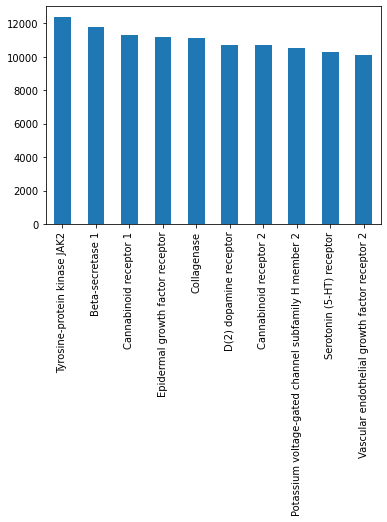

In [9]:
# top 10 value counts
df["target"].value_counts()[:10].plot(kind="bar")
plt.show()

In [10]:
np.where(df["ic50"]=="")

(array([      0,       1,       2, ..., 1812806, 1812807, 1812808]),)

In [11]:
df["ki"] = df["ki"].str.replace(" ", "")
df["ic50"] = df["ic50"].str.replace(" ", "")
df["kd"] = df["kd"].str.replace(" ", "")

In [12]:
empty_ki = np.where(df["ki"]=="")[0]
empty_ic50 = np.where(df["ic50"]=="")[0]
empty_kd = np.where(df["kd"]=="")[0]

In [13]:
df["ki"][empty_ki] = "NaN"
df["ic50"][empty_ic50] = "NaN"
df["kd"][empty_kd] = "NaN"

In [14]:
df["ki"] = df["ki"].apply(lambda x: "".join(ele for ele in list(x) if ele != ">"))
df["ic50"] = df["ic50"].apply(lambda x: "".join(ele for ele in list(x) if ele != ">"))
df["kd"] = df["kd"].apply(lambda x: "".join(ele for ele in list(x) if ele != ">"))

In [15]:
df["ki"] = df["ki"].apply(lambda x: "".join(ele for ele in list(x) if ele != "<"))
df["ic50"] = df["ic50"].apply(lambda x: "".join(ele for ele in list(x) if ele != "<"))
df["kd"] = df["kd"].apply(lambda x: "".join(ele for ele in list(x) if ele != "<"))

In [16]:
df["ki"] = df["ki"].values.astype(np.float)
df["ic50"] = df["ic50"].values.astype(np.float)
df["kd"] = df["kd"].values.astype(np.float)

In [17]:
df.head()

,cid,target,ki,ic50,kd
0,3081361,HIV-1 Protease,0.24,NaN,NaN
1,5327236,HIV-1 Protease,0.25,NaN,NaN
2,5327235,HIV-1 Protease,0.41,NaN,NaN
3,5327234,HIV-1 Protease,0.80,NaN,NaN
4,3009319,HIV-1 Protease,0.99,NaN,NaN


In [21]:
isna = df.isna().sum(); isna

cid             0
target          0
ki        1378354
ic50       674705
kd        1737382
dtype: int64

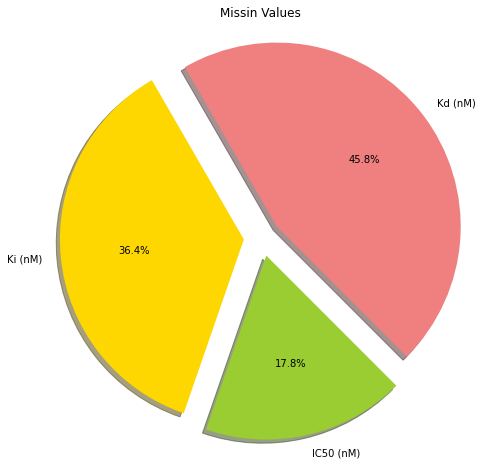

In [23]:
plt.figure(figsize=(8, 8))
plt.pie([isna["ki"], isna["ic50"], isna["kd"]], explode=(0.1, 0.1, 0.1), labels=("Ki (nM)", "IC50 (nM)", "Kd (nM)"),
        colors=["gold", "yellowgreen", "lightcoral", "lightskyblue"], autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Missin Values")
plt.show()

In [34]:
df.fillna(0, inplace=True)

In [37]:
ic50_empty = np.where(df["ic50"] == 0.0)[0]
ki_empty = np.where(df["ki"] == 0.0)[0]
kd_empty = np.where(df["kd"] == 0.0)[0]

In [55]:
ic50_ki_inter = set(ic50_empty).intersection(set(ki_empty))
ki_kd_inter = set(ki_empty).intersection(set(kd_empty))
kd_ic50_inter = set(kd_empty).intersection(set(ic50_empty))
all_empty = ic50_ki_inter.intersection(kd_empty)
ic50_ki_inter, ki_kd_inter, kd_ic50_inter, all_empty = list(ic50_ki_inter), list(ki_kd_inter), list(kd_ic50_inter), list(all_empty)

In [58]:
df[["ki", "ic50", "kd"]].iloc[sorted(ic50_ki_inter), :]

,ki,ic50,kd
453,0.0,0.0,0.000
461,0.0,0.0,0.000
739,0.0,0.0,0.000
740,0.0,0.0,0.000
741,0.0,0.0,0.000
...,...,...,...
1812614,0.0,0.0,2.900
1812615,0.0,0.0,0.150
1812616,0.0,0.0,2.700
1812617,0.0,0.0,0.400


In [59]:
df[["ki", "ic50", "kd"]].iloc[sorted(ki_kd_inter), :]

,ki,ic50,kd
142,0.0,50000.0,0.0
144,0.0,6676.9,0.0
180,0.0,8.5,0.0
181,0.0,177.0,0.0
183,0.0,164.0,0.0
...,...,...,...
1812765,0.0,100.0,0.0
1812766,0.0,6.0,0.0
1812767,0.0,8.0,0.0
1812768,0.0,37.0,0.0


In [60]:
df[["ki", "ic50", "kd"]].iloc[sorted(kd_ic50_inter), :]

,ki,ic50,kd
0,0.24,0.0,0.0
1,0.25,0.0,0.0
2,0.41,0.0,0.0
3,0.80,0.0,0.0
4,0.99,0.0,0.0
...,...,...,...
1812804,1700.00,0.0,0.0
1812805,4000.00,0.0,0.0
1812806,11900.00,0.0,0.0
1812807,2600.00,0.0,0.0


In [61]:
df[["ki", "ic50", "kd"]].iloc[sorted(all_empty), :]

,ki,ic50,kd
453,0.0,0.0,0.0
461,0.0,0.0,0.0
739,0.0,0.0,0.0
740,0.0,0.0,0.0
741,0.0,0.0,0.0
...,...,...,...
1812267,0.0,0.0,0.0
1812270,0.0,0.0,0.0
1812273,0.0,0.0,0.0
1812274,0.0,0.0,0.0


In [87]:
col1_empty = np.where(df["ki"] == 0.0)[0]
col2_empty = np.where(df["ic50"] == 0.0)[0]
col3_empty = np.where(df["kd"] == 0.0)[0]
val = df[["ki", "ic50", "kd"]].values
val[col1_empty, 0] = 999999
val[col2_empty, 1] = 999999
val[col3_empty, 2] = 999999
val

array([[2.40000e-01, 9.99999e+05, 9.99999e+05],
       [2.50000e-01, 9.99999e+05, 9.99999e+05],
       [4.10000e-01, 9.99999e+05, 9.99999e+05],
       ...,
       [1.19000e+04, 9.99999e+05, 9.99999e+05],
       [2.60000e+03, 9.99999e+05, 9.99999e+05],
       [1.60000e+03, 9.99999e+05, 9.99999e+05]])

In [92]:
min_values = val.min(axis=1)
min_values[np.where(min_values == 999999)] = 0.0
np.where(min_values == 999999)

(array([], dtype=int64),)

In [93]:
df["min"] = min_values
df.head()

,cid,target,ki,ic50,kd,min
0,3081361,HIV-1 Protease,0.24,0.0,0.0,0.24
1,5327236,HIV-1 Protease,0.25,0.0,0.0,0.25
2,5327235,HIV-1 Protease,0.41,0.0,0.0,0.41
3,5327234,HIV-1 Protease,0.80,0.0,0.0,0.80
4,3009319,HIV-1 Protease,0.99,0.0,0.0,0.99


In [95]:
df["mean"] = np.mean(df[["ki", "ic50", "kd"]], axis=1)

In [96]:
df.head()

,cid,target,ki,ic50,kd,min,mean
0,3081361,HIV-1 Protease,0.24,0.0,0.0,0.24,0.080000
1,5327236,HIV-1 Protease,0.25,0.0,0.0,0.25,0.083333
2,5327235,HIV-1 Protease,0.41,0.0,0.0,0.41,0.136667
3,5327234,HIV-1 Protease,0.80,0.0,0.0,0.80,0.266667
4,3009319,HIV-1 Protease,0.99,0.0,0.0,0.99,0.330000


In [97]:
df.to_sql("drugs_action_proc", con)

In [98]:
con.commit()